# Naive Bayes in Python

http://daydreamingnumbers.com/blog/introduction-naive-bayes-algorithm-python/

In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
play_tennis = pd.read_csv("data/PlayTennis.csv")

In [11]:
play_tennis.head()

Outlook  Temperature  Humidity  Wind  Play Tennis
0        2            1         0     1            0
1        2            1         0     0            0
2        0            1         0     1            1
3        1            2         0     1            1
4        1            0         1     1            1

In [4]:
number = LabelEncoder()
play_tennis['Outlook'] = number.fit_transform(play_tennis['Outlook'])
play_tennis['Temperature'] = number.fit_transform(play_tennis['Temperature'])
play_tennis['Humidity'] = number.fit_transform(play_tennis['Humidity'])
play_tennis['Wind'] = number.fit_transform(play_tennis['Wind'])
play_tennis['Play Tennis'] = number.fit_transform(play_tennis['Play Tennis'])

In [50]:
# What we need is the probability that Joe will play tennis given the temperature is mild?
# P(Joe Plays | Mild Temperature) = P(Mild Temperature | Joe plays) P(Joe Plays) / P(Mild Temperature)

p_mild_play = play_tennis[play_tennis['Temperature'] == 0]['Play Tennis'].sum() / play_tennis['Play Tennis'].sum()
p_play = play_tennis['Play Tennis'].sum() / len(play_tennis)
p_mild = len(play_tennis[play_tennis['Temperature'] == 0]) / len(play_tennis)
p_mild_play *  p_play / p_mild

0.7500000000000001

In [56]:
features = ["Temperature"] #["Outlook", "Temperature", "Humidity", "Wind"]
target = "Play Tennis"

In [57]:
features_train, features_test, target_train, target_test = train_test_split(
    play_tennis[features],
    play_tennis[target],
    test_size = 0.0,
    random_state = 54
)

In [58]:
model = GaussianNB()
model.fit(features_train, target_train)

GaussianNB(priors=None)

In [60]:
# pred = model.predict(features_test)
# accuracy_score(target_test, pred)

In [61]:
model.predict_proba([[0]])

array([[0.28683668, 0.71316332]])

In [62]:
model.predict([[0]])

array([1])

# In Depth: Naive Bayes Classification

In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

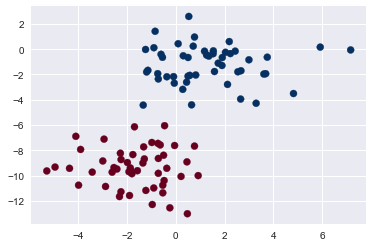

In [64]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

/Users/patornute/.pyenv/versions/3.6.5/envs/latest/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/patornute/.pyenv/versions/3.6.5/envs/latest/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(<matplotlib.axes._subplots.AxesSubplot at 0x10d832898>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10d832898>)

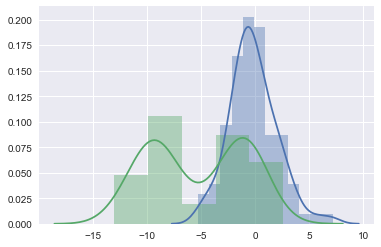

In [75]:
sns.distplot(X[:, 0]), sns.distplot(X[:, 1])

In [76]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [77]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

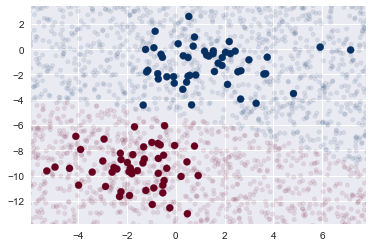

In [78]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [79]:
# Multinomial

from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [80]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [82]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [83]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [84]:
predict_category('sending a payload to the ISS')

'sci.space'